# Exercise 4.14

Measurements of a cross section for nuclear reactions yields the following
data.

| $K_{i}$ | Cross section | Error |
|:------:|:-------------:|:-----:|
|   30   |       11      |  1\.5  |
|   45   |       13      |  1\.0  |
|   90   |       17      |  2\.0  |
|   120  |       17      |  2\.0  |
|   150  |       14      |  1\.5  |

The units of cross section are 10$^{-30}\,$cm$^{2}$/steradian. Assume the quoted errors correspond to one Gaussian standard deviation. The assumed model has the form

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math
import progressbar
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
widgets = [
        'Test: ', progressbar.Percentage(),
        ' ', progressbar.Bar(marker=progressbar.RotatingMarker()),
        ' ', progressbar.ETA()]

In [38]:
angles = np.array([30.,45.,90.,120.,150.])
data = [11,13,17,17,14]
sigmas = [1.5,1.0,2.0,2.0,1.5]
angles_cont = np.arange(20,160,1)

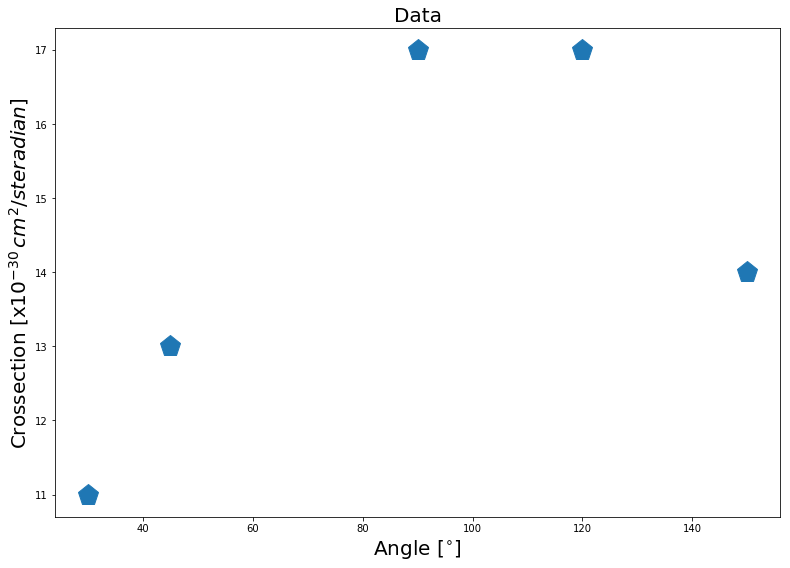

In [3]:
plt.figure(figsize=(13,9))
plt.xlabel(r"Angle [$^{\circ}$]",fontsize=20)
plt.ylabel("Crossection [x10$^{-30}\,cm^{2}/steradian$]",fontsize=20)
plt.title("Data",fontsize=20)
plt.plot(angles, data,'p',markersize =22)
plt.show()

In [4]:
def model(angle, A,B,C):
    angle = angle/180.0*math.pi
    return A+B*np.cos(angle)+C*np.cos(angle*angle)

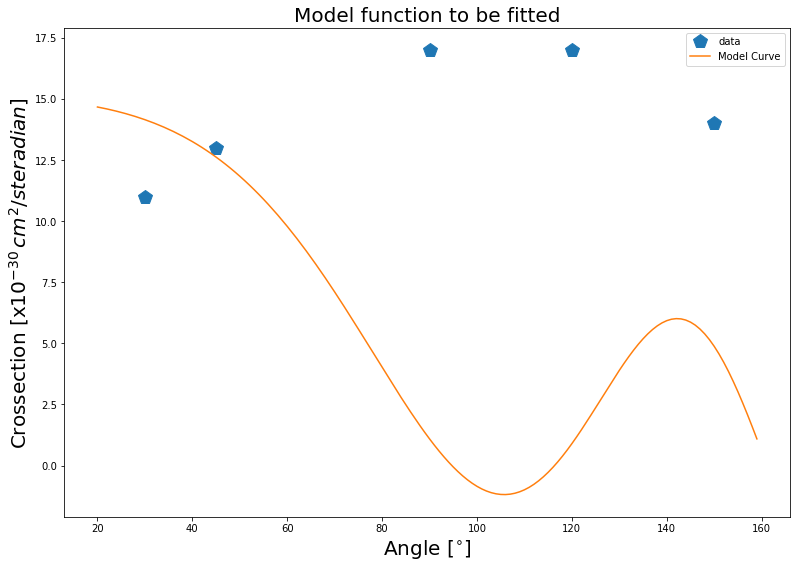

In [5]:

plt.figure(figsize=(13,9))
plt.title("Model function to be fitted",fontsize=20)
plt.xlabel(r"Angle [$^{\circ}$]",fontsize=20)
plt.ylabel("Crossection [x10$^{-30}\,cm^{2}/steradian$]",fontsize=20)
plt.plot(angles, data,'p', label='data',markersize=15)
plt.plot(angles_cont,model(angles_cont,5,5,5),label='Model Curve')
plt.legend()
plt.show()

In [11]:
def gaus(x,mean,sigma):
    factor1 = 1.0/(math.sqrt(2*math.pi)*sigma)
    factor2 = math.exp(-(x-mean)*(x-mean)/(2.0*sigma*sigma))                  
    return factor1*factor2

def PDF(angles, data, sigmas, A, B, C):
    result = 1.0
    for i in range(len(angles)):
        result= result*gaus(data[i],model(angles[i],A,B,C),sigmas[i])
    return result

In [7]:
PDF(angles, data, sigmas, 11,3,-4)

2.832146656945463e-16

In [9]:
stepsize = 0.001
A_range = np.arange(15.3,15.4,stepsize)
B_range = np.arange(-1.1,-1.0,stepsize)
C_range = np.arange(-2.6,-2.5,stepsize)

In [10]:
mode=0.0
mode_a = mode_b = mode_c=0.0
norm = 0.0
count=0

maxvalue = len(A_range)*len(B_range)*len(C_range)
bar = progressbar.ProgressBar(widgets=widgets, maxval=maxvalue).start()

for a in A_range:
    for b in B_range:
        for c in C_range:
            count+=1
            current_pdf_value = PDF(angles, data, sigmas,a,b,c)
            if current_pdf_value>=mode:
                mode= current_pdf_value
                mode_a=a
                mode_b=b
                mode_c=c
            norm+=current_pdf_value
            bar.update(count)
            
bar.finish()       
print norm
print mode/norm
print mode_a
print mode_b
print mode_c

799.748662253
9.83185660691e-07
15.356
-1.076
-2.568


Test: 100% |||||||||||||||||||||||||||||||||||||||||||||||||||||| Time: 0:00:17


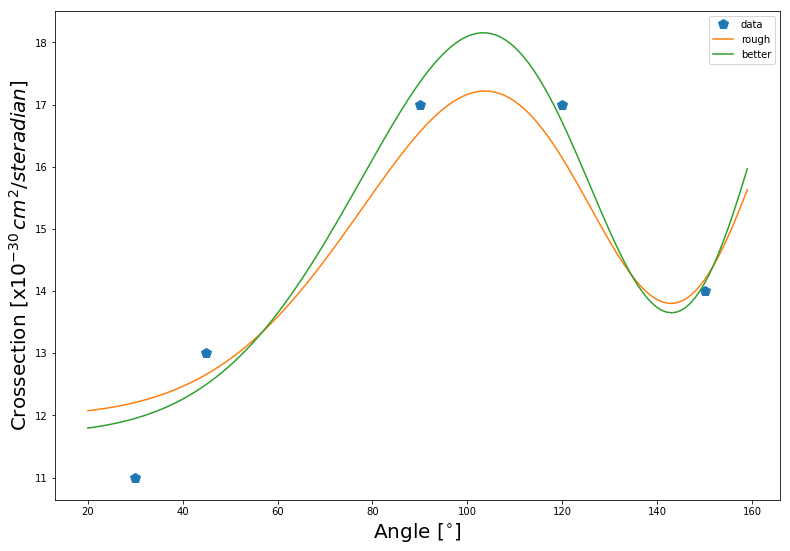

In [11]:
plt.figure(figsize=(13,9))
plt.xlabel(r"Angle [$^{\circ}$]",fontsize=20)
plt.ylabel("Crossection [x10$^{-30}\,cm^{2}/steradian$]",fontsize=20)
plt.plot(angles,data,'p',label = 'data',markersize=11)
plt.plot(angles_cont,model(angles_cont,15,-1,-2),label='rough')
plt.plot(angles_cont,model(angles_cont,mode_a,mode_b,mode_c),label='better')
#plt.plot(angles_cont,y_cont)
plt.legend()
plt.show()

# Kuer

In [12]:
stepsize = 0.02
#A_range = np.arange(13,18,stepsize)
#B_range = np.arange(-4,0,stepsize)
#C_range = np.arange(-4,0,stepsize)
A_range = np.linspace(9,19,num=200)
B_range = np.linspace(-6,4,num=200)
C_range = np.linspace(-6,4,num=200)
PDF_values = np.zeros((len(A_range),len(B_range),len(C_range)))
mode=0.0
mode_a = mode_b = mode_c=0.0
norm = 0.0
count=0
a_count=0
b_count=0
c_count=0
maxvalue = len(A_range)*len(B_range)*len(C_range)
bar = progressbar.ProgressBar(widgets=widgets, maxval=maxvalue).start()

for a in A_range:
    a_count+=1
    b_count=0
    for b in B_range:
        b_count+=1
        c_count=0
        for c in C_range:
            c_count+=1
            count+=1
            current_pdf_value = PDF(angles, data, sigmas,a,b,c)
            if current_pdf_value>=mode:
                mode= current_pdf_value
                mode_a=a
                mode_b=b
                mode_c=c
            norm+=current_pdf_value
            PDF_values[a_count-1][b_count-1][c_count-1]=current_pdf_value
            bar.update(count)
            
bar.finish()       
print norm
print mode/norm
print mode_a
print mode_b
print mode_c

71.6365967654
1.0971209349e-05
15.3819095477
-1.07537688442
-2.58291457286


Test: 100% |||||||||||||||||||||||||||||||||||||||||||||||||||||| Time: 0:02:16


In [14]:
PDF_values=PDF_values/norm

In [15]:
marg_AB = np.zeros((len(A_range),len(B_range)))
marg_BC = np.zeros((len(B_range),len(C_range)))
marg_AC = np.zeros((len(A_range),len(C_range)))
for i_a in range(0,len(A_range)):
    for i_b in range(0,len(B_range)):
        for i_c in range(0,len(C_range)):
            marg_AB[i_a][i_b] += PDF_values[i_a][i_b][i_c]  
            marg_BC[i_b][i_c] += PDF_values[i_a][i_b][i_c]
            marg_AC[i_a][i_c] += PDF_values[i_a][i_b][i_c]

In [16]:
marg_AB


array([[  6.15761657e-23,   8.16348855e-23,   1.07906514e-22, ...,
          9.98139621e-22,   7.90163624e-22,   6.24025134e-22],
       [  1.00143460e-22,   1.32605957e-22,   1.75070920e-22, ...,
          1.47603957e-21,   1.16844183e-21,   9.22731871e-22],
       [  1.61975233e-22,   2.14224947e-22,   2.82490525e-22, ...,
          2.17591914e-21,   1.72240485e-21,   1.36015085e-21],
       ..., 
       [  3.29539175e-14,   4.15100670e-14,   5.21622442e-14, ...,
          2.74565267e-16,   2.02006911e-16,   1.48173905e-16],
       [  2.64697584e-14,   3.33406205e-14,   4.18941469e-14, ...,
          1.91534217e-16,   1.40732581e-16,   1.03092462e-16],
       [  2.11942578e-14,   2.66942812e-14,   3.35408202e-14, ...,
          1.32849517e-16,   9.74841766e-17,   7.13167256e-17]])

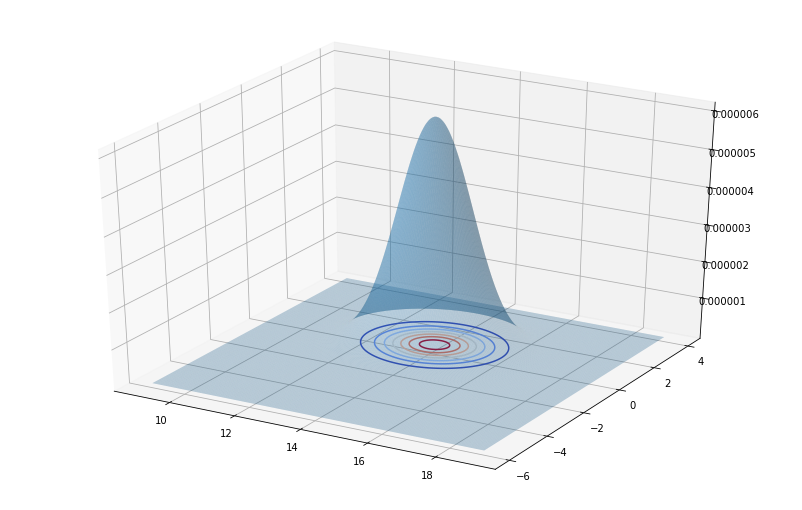

In [17]:
fig = plt.figure(figsize = (14,9))
ax = fig.gca(projection='3d')
XX, YY = np.meshgrid(A_range, B_range)
cset = ax.contour(XX, YY, marg_AB, zdir='z', offset=0, cmap=cm.coolwarm)
ax.plot_surface(XX, YY, marg_AB, rstride=1, cstride=1, alpha=0.3)
plt.show()

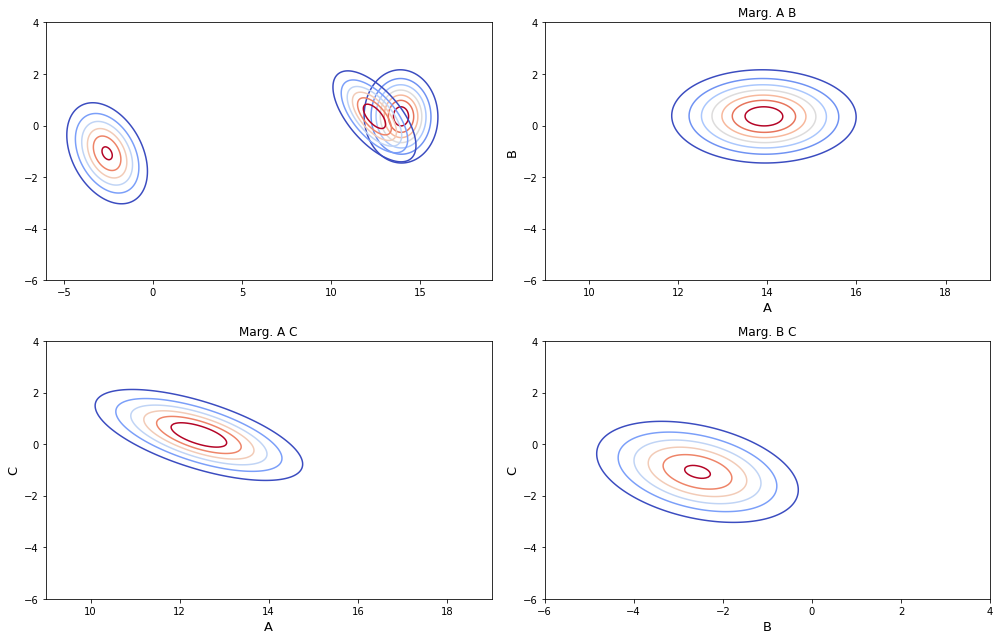

In [18]:
fig,axarr = plt.subplots(2,2,figsize = (14,9))
axarr[0][0].contour(A_range, B_range, marg_AB, cmap=cm.coolwarm)
axarr[0][0].contour(A_range, C_range, marg_AC, cmap=cm.coolwarm)
axarr[0][0].contour(B_range, C_range, marg_BC, cmap=cm.coolwarm)
plt.subplot(2,2,2)
plt.title("Marg. A B")
plt.xlabel("A",fontsize=13)
plt.ylabel("B",fontsize=13)
plt.contour(A_range, B_range, marg_AB, cmap=cm.coolwarm)
plt.subplot(2,2,3)
plt.title("Marg. A C")
plt.xlabel("A",fontsize=13)
plt.ylabel("C",fontsize=13)
plt.contour(A_range, C_range, marg_AC, cmap=cm.coolwarm)
plt.subplot(2,2,4)
plt.title("Marg. B C")
plt.xlabel("B",fontsize=13)
plt.ylabel("C",fontsize=13)
plt.contour(B_range, C_range, marg_BC, cmap=cm.coolwarm)
plt.tight_layout()
plt.show()

# Other Model functions?

In [19]:
def parabel(x,A,B,C):
    return A*(x-B)*(x-B)+C

def PDF2(angles, data, sigmas, A, B, C):
    result = 1.0
    for i in range(len(angles)):
        result= result*gaus(data[i],parabel(angles[i],A,B,C),sigmas[i])
    return result 

In [20]:
A_range_par = np.linspace(-0.0001,-0.01,num=200)
B_range_par = np.linspace(70,130,num=200)
C_range_par = np.linspace(0,20,num=200)

mode_par=0.0
mode_a_par = mode_b_par = mode_c_par=0.0
norm_par = 0.0
count=0

maxvalue = len(A_range_par)*len(B_range_par)*len(C_range_par)
bar = progressbar.ProgressBar(widgets=widgets, maxval=maxvalue).start()

for a in A_range_par:
    for b in B_range_par:
        for c in C_range_par:
            count+=1
            current_pdf_value = PDF2(angles, data, sigmas,a,b,c)
            if current_pdf_value>=mode_par:
                mode_par= current_pdf_value
                mode_a_par=a
                mode_b_par=b
                mode_c_par=c
            norm_par+=current_pdf_value
            
            bar.update(count)
            
bar.finish()       
print norm_par
print mode_par/norm_par
print mode_a_par
print mode_b_par
print mode_c_par

24.0167876428
4.47830369908e-05
-0.00124422110553
101.35678392
17.0854271357


Test: 100% |||||||||||||||||||||||||||||||||||||||||||||||||||||| Time: 0:01:11


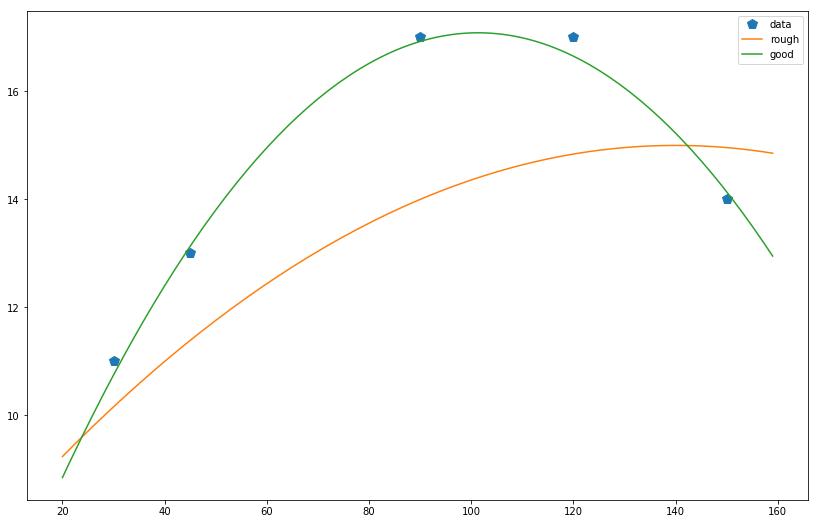

In [21]:
fig = plt.figure(figsize = (14,9))
plt.plot(angles,data,'p',label = 'data',markersize=11)
plt.plot(angles_cont,parabel(angles_cont,-0.0004,140,15),label="rough")
plt.plot(angles_cont,parabel(angles_cont,mode_a_par,mode_b_par,mode_c_par),label='good')
plt.legend()
plt.show()

In [7]:
def linear(x, A, B):
    return A*x+B
def PDF3(angles, data, sigmas, A, B):
    result = 1.0
    for i in range(len(angles)):
        result= result*gaus(data[i],linear(angles[i],A,B),sigmas[i])
    return result 

In [50]:
A_range_lin = np.linspace(-0.4,0.1,num=200)
B_range_lin = np.linspace(11.0,12.5,num=200)
#C_range_par = np.linspace(0,20,num=200)
PDF3_values = np.zeros((len(A_range_lin),len(B_range_lin)))
mode_lin = 0.0
mode_a_lin = 0.0
mode_b_lin = 0.0#mode_c_par=0.0
norm_lin = 0.0
count=0


maxvalue = len(A_range_lin)*len(B_range_lin)#*len(C_range_lin)
bar = progressbar.ProgressBar(widgets=widgets, maxval=maxvalue).start()
a_count_lin = 0
for a in A_range_lin:
    a_count_lin+=1
    b_count_lin = 0
    for b in B_range_lin:
            b_count_lin+=1
            count+=1
            current_pdf_value = PDF3(angles, data, sigmas,a,b)
            if current_pdf_value>=mode_lin:
                mode_lin= current_pdf_value
                mode_a_lin=a
                mode_b_lin=b
                #mode_c_par=c
            norm_lin+=current_pdf_value
            PDF3_values[a_count_lin-1][b_count_lin-1] = current_pdf_value 
            bar.update(count)
            
bar.finish()    
PDF3_values = PDF3_values/norm_lin
print norm_lin
print mode_lin/norm_lin
print mode_a_lin
print mode_b_lin
#print mode_c_par

0.100150545677
0.000718918860022
0.027135678392
11.6331658291


Test: 100% |||||||||||||||||||||||||||||||||||||||||||||||||||||| Time: 0:00:00


In [51]:
PDF3_values

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  1.00797933e-18,   9.31040819e-19,   8.59858263e-19, ...,
          1.18114071e-26,   1.06220003e-26,   9.55107012e-27],
       [  5.86478715e-20,   5.39895117e-20,   4.96944168e-20, ...,
          3.54398806e-28,   3.17641305e-28,   2.84657576e-28],
       [  3.04484646e-21,   2.79358952e-21,   2.56271814e-21, ...,
          9.48845228e-30,   8.47578926e-30,   7.57017598e-30]])

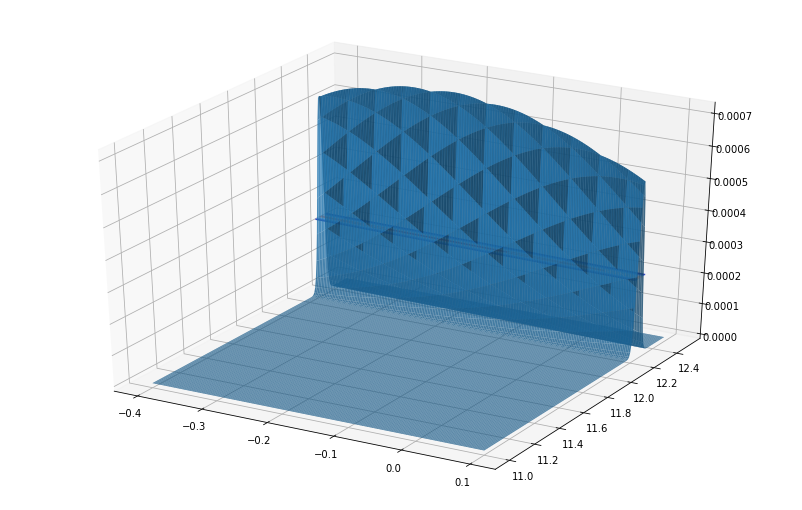

In [52]:
fig = plt.figure(figsize = (14,9))
ax = fig.gca(projection='3d')
XX, YY = np.meshgrid(A_range_lin, B_range_lin)
ax.plot_surface(XX, YY, PDF3_values, rstride=1, cstride=1, alpha=0.8)
ax.contour(XX, YY, PDF3_values, zdir='z', offset=0.00025, cmap=cm.coolwarm)
plt.show()

In [ ]:
plt.figure(figsize = (14,9))
plt.contour(A_range_lin,B_range_lin,PDF3_values)
plt.show()

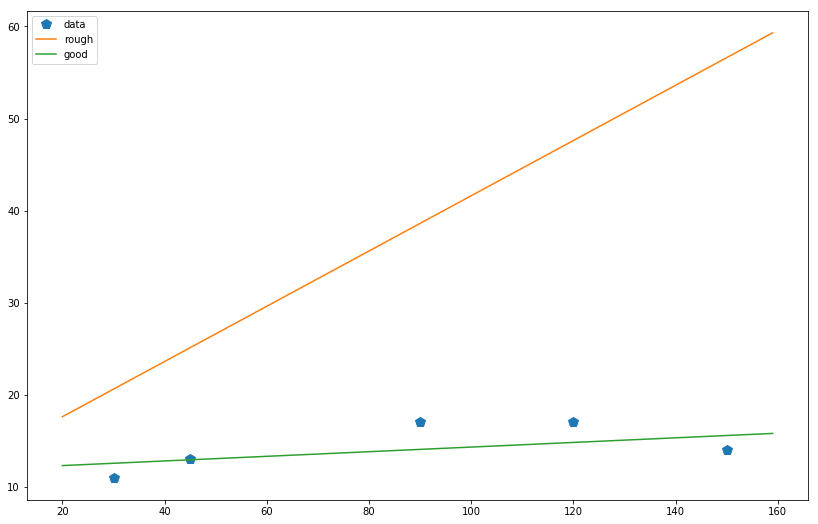

In [40]:
fig = plt.figure(figsize = (14,9))
plt.plot(angles,data,'p',label = 'data',markersize=11)
plt.plot(angles_cont,linear(angles_cont,0.3,11.61),label='rough')
plt.plot(angles_cont,linear(angles_cont,mode_a_lin,mode_b_lin),label='good')
plt.legend()
plt.show()